# Introduction:

Une sonde spatiale est un véhicule spatial sans équipage lancé dans l'espace pour étudier à plus ou moins grande distance différents objets célestes et elle est amenée à franchir de grandes distances et à fonctionner loin de la Terre et du Soleil. Le facteur principale qui doit être mis en jeu afin de réussir la mission de la sonde est la précision et la complexité de la navigation.

Dans cette optique, on essayera dans ce projet de simuler la trajectoire d'une sonde spatiale dans le système solaire en intégrant les équations de mouvement de Newton, et pour ce faire on commencera d'abord dans la section 1  et 2 par simuler le système solaire et comprendre sa dynamique, et dans la section 3, on va essayer de simuler la trajectoire de la sonde spatiale New Horizons.

Dans cette première partie, on se fixe comme objectif de simuler la dynamique du système solaire en 2 dimensions.

**Remarques :** 

Tout les codes de cette partie vont être dans le dossier **In_2dim**.

# 1. Simulation de système solaire:

## 1.1 Classe des objets.

Pour simplifier la tâche de manipulation des planètes et des sondes, il vaut mieux assigner à chaque objet une classe qui le caractérise avec ses propres attributs:

1. Attributs
    1. Masse
    2. Position initiale $(x_0,y_0)$
    3. Vitesse initiale $(vx_0, vy_0)$
    4. Nom de l'objet
    5. Liste des positions $(x, y)$
    7. Liste des vitesses $(vx, vy)$
    
On peut alors définir cette classe avec le code en bas. 

(La classe est créée dans le fichier objet.py)

In [1]:
class objet:
	""" Classe représentant les objets qui influence par la gravitation
		Attributs:
		nom 
		masse: Kg
		position (x, y): au (astronomical unit)
		vitesse (v_x, v_y) : au/day
	"""

	nom = "objet"
	masse = None
	x0 = 0
	y0 = 0
	vx0 = 0
	vy0 = 0
	#Listes des positions et vitesse 
	x = None 
	y = None
	vx = None
	vy = None 

    #Definition de constructeur
	def __init__(self, nom = "objet", masse = None, x0 = 0, y0 = 0, vx0 = 0, vy0 = 0):
		"""Constructeur de notre classe"""
		self.nom = nom
		self.masse = masse
		self.x0 = x0
		self.y0 = y0
		self.vx0 = vx0
		self.vy0 = vy0

**Variables Globales:**

Dans toute cette partie, on va utiliser ces variables globales qui vont servir dans les calculs prochains.

In [2]:
#Definitions de parametres 
au = 1.49597870e11 #Unité astronomique
jour = 24*3600 #Un jour

G = 6.67408e-11 #Constante gravitationelle 

## 1.2 Equations de Newtons:

Les équations qu'on va utiliser pour décrire le mouvement des planètes et les sondes spatiales sont les équations de Newton, donc, pour décrire le mouvement d'un objet dans le système solaire qui subit une force gravitationnelle de la part du soleil, il suffit d'intégrer les équations de Newton de secondes ordres en unités internationales.


\begin{equation}
\frac{d²x}{dt²} = -G \frac{M_{soleil}}{(x²+y²)^{3/2}} x \\
\frac{d²y}{dt²} = -G \frac{M_{soleil}}{(x²+y²)^{3/2}} y
\end{equation}


Mais, pour des résultats plus signicatifs, il vaut mieux travailler avec des distance en $au$ (unité astronomique $:=$  distance soleil-terre) et pour le temps en $jour$, d'où les équations suivantes en unités pratiques:

\begin{equation}
\frac{d²x}{dt²} = -G \frac{M_{soleil}}{(x²+y²)^{3/2}} x \ \frac{(day)²}{(au)³} \\
\frac{d²y}{dt²} = -G \frac{M_{soleil}}{(x²+y²)^{3/2}} y \ \frac{(day)²}{(au)³}
\end{equation}


**Implémentation :** (dans le fichier objet.py) -> NB: Toutes les fonctions seront stockés dans le fichier "objet.py"

Pour implémenter les équations de Newton, il est préférable de définir des fonctions $fx$ et $fy$ qui prennent en argument la masse de l'objet qu'on gravite autour et les coordonnées de l'objet gravitant et qui donnent comme output l'acceleration gravitationnelle subit par l'objet suivant $\vec{x}$ et $\vec{y}$.


In [3]:
#Definition de fonction fx(M,x,y) et fy(M,x,y)
def fx(M,x,y):
	"""
	Retourne l'acceleration gravitationnelle suivant x dû à un objet de masse M distants de l'objet étudié de x**2+y**2
	"""
	return -((G*M)/(x**2+y**2)**(3/2))*x*(jour**2/au**3)

def fy(M,x,y):
	"""
	Retourne l'acceleration gravitationnelle suivant y dû à un objet de masse M distants de l'objet étudié de x**2+y**2
	"""
	return -((G*M)/(x**2+y**2)**(3/2))*y*(jour**2/au**3)

## 1.3 Simulation d'interaction entre le soleil et une autre planète.

Puisque la masse de Soleil $ M_{soleil} >> M_{planète} $, on peut consider que le soleil reste fixe au cours de mouvement, donc on peut se servir des fonctions de la partie **1.2** pour intérgrer les équations de Newton, il nous faut juste une certaine condition initiale sur la position et la vitesse qu'on a pris d'ici: http://vo.imcce.fr/webservices/miriade.

Dans un premier temps, on peut faire cette première simulation pour le soleil et la terre.

Dans le code ci-dessous, on définit les conditions initiales de la terre, le pas de temps $dt$ et la période d'intégration $T$ et on rénitialise les attributs $terre.x/y$ et $terre.vx/vy$ qui vont contenir les positions et les vitesses de la terre durant toute la période d'intégration.

In [4]:
#Pour faire des plots
import numpy as np
import matplotlib.pyplot as plt

# Definition des objets
soleil = objet("Soleil", 1.989*1e30, 0, 0, 0, 0) #(nom, masse, x, y, vx, vy)

#Données prises de http://vo.imcce.fr/webservices/miriade
terre = objet ("Terre", 5.972*1e24, -0.7528373239252,  0.6375222355089,  -0.0113914294224, -0.0131912591762)


dt = 1 #step, un jour
T = int(365/dt)*20 # Periode d'integration (Nombre de steps) -> une année * ...

#Definition des tableau de coordonnés et initiation
terre.x = np.zeros(T) ; terre.x[0] = terre.x0 
terre.y = np.zeros(T) ; terre.y[0] = terre.y0

terre.vx = np.zeros(T) ; terre.vx[0] = terre.vx0
terre.vy = np.zeros(T) ; terre.vy[0] = terre.vy0

### 1.3.1 Comment estimer la précision des algorithmes d'intégration?

**Conservation d'énergie totale de système:**

Au cours de l'intégration des équations de mouvement, l'énergie de système doit rester conservée, donc on va utiliser comme critère de précision, la variation de l'énergie mécanique (massique) de l'objet étudié, si l'énergie mécanique reste la plus proche possible de la valeur initiale, alors la méthode d'intégration choisie est plus précise. On va calculer alors l'énergie mécanique (massique) à l'aide de la fonction $E$.


In [5]:
def E(M, x, y, vx, vy):
	return 0.5*(vx**2+vy**2)*(au**2/jour**2)-(G*M)/(np.sqrt(x**2+y**2)*au)
E = np.vectorize(E)

N.B:

 * La fonction $E$ calcule l'énergie (massique) d'un objet sous effet d'un autre objet (seul) de masse M. On verra après une fonction qui permettra de calculer l'énergie d'un objet qui subit l'effet de gravitations de plusieurs autres objets.


**Comparaison des trajectoires:**

Aussi pour s'assurer des validités des calculs, on va comparer les trajectoires simulées aux données prises par les observations astrométriques.

### 1.3.2 Intégration par la méthode d'Euler:

**Méthode:**

A titre d'initiation, on va commencer par intégrer les équations de Newton à l'aide de méthode d'Euler qui consiste à faire les étapes suivantes:

$$\vec{X}_{i+1} = \vec{X_{i}} + \frac{h}{2}.\vec{V}_{i} $$

$$\vec{V}_{i+1} = \vec{V}_{i} + \frac{h}{2}.\vec{F}(\vec{X}_{i}) $$

Avec $\vec{F}$ l'accelération gravitationnelle, pour notre cas particulier de Système Soleil-Terre on a:

\begin{equation}
F_x = -G \frac{M_{soleil}}{(x²+y²)^{3/2}} x \ \frac{(day)²}{(au)³} \\ 
F_y = -G \frac{M_{soleil}}{(x²+y²)^{3/2}} y \ \frac{(day)²}{(au)³}
\end{equation}

Et $h$ le pas d'intégration qui correspond à la variable $dt$.

**Implémentation:** (dans le fichier Interaction_Soleil_Planete_Euler.py)

In [6]:
#----------------------------------------------------------------------------------------------------------

# Integration des equations de newton par methode d'euler

#-------------------------

for i in range(T-1): 

    #Affectation des vitesses a l'instant i+1
	terre.vx[i+1] = terre.vx[i] + dt*fx(soleil.masse, terre.x[i], terre.y[i])
	terre.vy[i+1] = terre.vy[i] + dt*fy(soleil.masse, terre.x[i], terre.y[i])

    #Affectation des positions a l'instant i+1
	terre.x[i+1] = terre.x[i] + dt*terre.vx[i]
	terre.y[i+1] = terre.y[i] + dt*terre.vy[i]

#----------------------------------------------------------------------------------------------------

**Plot de trajectoire:**

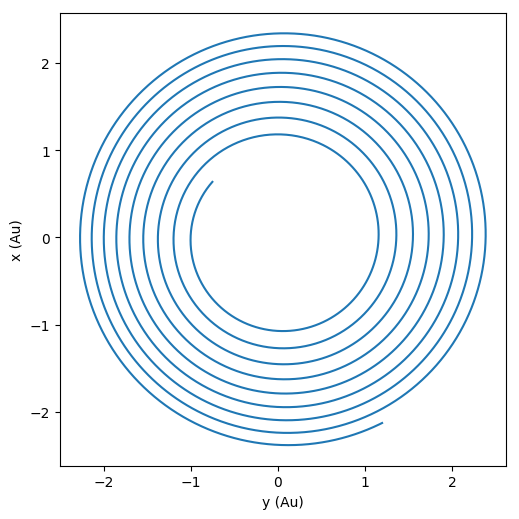

In [7]:
fig=plt.figure(figsize=(9, 6), dpi= 100, facecolor='w', edgecolor='k') #To modify the size of the figure
ax = fig.add_subplot(111) #definition de l'axe

#Plot de la trajectoire simulee:        
ax.plot(terre.x, terre.y) #Plot de la trajectoire simulee de la terre

plt.xlabel("y (Au)")
plt.ylabel("x (Au)")
plt.gca().set_aspect('equal', adjustable='box') #equal ratios of x and y

plt.show()

**Estimation précision en regardant l'énergie mécanique:**

Résultats : 
Energie moyenne = -0.554252722407, Ecart_Type = 0.132223515506


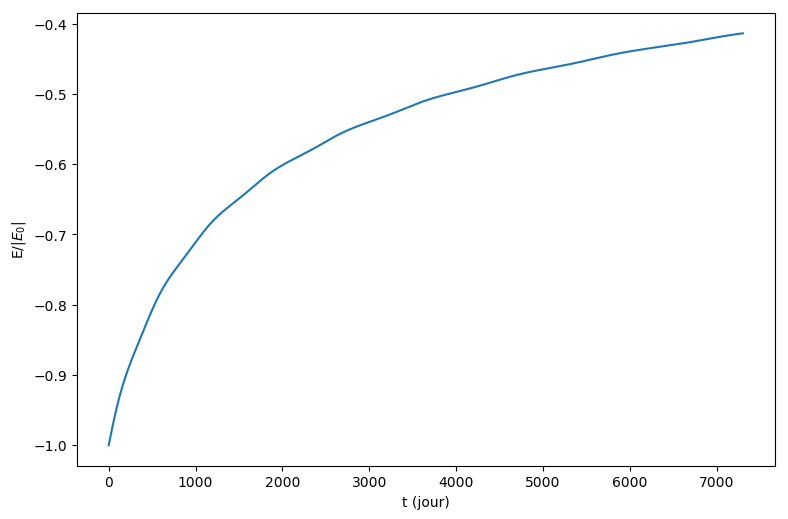

In [8]:
Nrg = E(soleil.masse, terre.x, terre.y, terre.vx, terre.vy) #Calcul d'energie mecanique
Nrg /= np.abs(Nrg[0])  #Pour Normaliser l'energie et pour faire un plot plus significatif

#Definition de figure
fig=plt.figure(figsize=(9, 6), dpi= 100, facecolor='w', edgecolor='k') #To modify the size of the figure
ax = fig.add_subplot(111) #definition de l'axe

#Plot d'energie en fonction de temps
t = np.linspace(1,T,T)*dt
ax.plot(t, Nrg)

ax.set_xlabel("t (jour)")
ax.set_ylabel("E/$|E_0|$")

ax.get_yaxis().get_major_formatter().set_useOffset(False) #Disable scaling of values in plot wrt y-axis

#Affichage de l'energie moyenne
print("Résultats : ")
print("Energie moyenne = " + str(np.mean(Nrg)) + ", Ecart_Type = " + str(np.std(Nrg)))

plt.show()

On remarque si on augmente le pas d'intégration $dt$ la précision diminue, en plus, la trajectoire simulée n'est pas fermée, par conséquent, il faut utiliser une méthode d'intégration plus précise.

### 1.3.3 Intégration par la méthode de Runge-Kutta d'ordre 2

La méthode d'Euler est une méthode dite de premier d'ordre où l'erreur d'intergration est de l'ordre $h$, donc pour encore avoir plus de précision, il faut utiliser une méthode plus précise d'où la méthode de Runge-Kutta d'ordre 2.

**Méthode:**

Soit $h$ le pas d'intégration, le méthode de Runge-Kutta d'ordre 2 consiste à faire les étapes suivantes: 

$$\vec{X}_{i+1} = \vec{X_{i}} + \frac{h}{2}.\vec{V}_{i+1/2} $$

$$\vec{V}_{i+1} = \vec{V}_{i} + \frac{h}{2}.\vec{F}(\vec{X}_{i+1/2}) $$

telles que :

$$ \vec{X}_{i+1/2} = \vec{X}_{i} + \frac{h}{2}.\vec{V}_{i} $$


$$ \vec{V}_{i+1/2} = \vec{V}_{i} + \frac{h}{2}.\vec{F}(\vec{X}_{i}) $$

Avec $\vec{F}$ déjà définie dans la méthode d'Euler (1.3.2)

La particularité de cette méthode consiste à définir des variables au milieu $\vec{X}_{i+1/2}$ et $\vec{V}_{i+1/2}$ qui servent comme intermédiaires dans le calcul.


**Implémentation:** (dans le fichier Interaction_Soleil_Planete_Runge-Kutta2.py)

In [9]:
#----------------------------------------------------------------------------------------------------------

# Integration des equations de newton par Runge Kutta2

#-------------------------

for i in range(T-1): 

#Definition des variables de milieux

	vx_demi = terre.vx[i] + (dt/2)*fx(soleil.masse, terre.x[i], terre.y[i])
	vy_demi = terre.vy[i] + (dt/2)*fy(soleil.masse, terre.x[i], terre.y[i])

	x_demi = terre.x[i] + (dt/2)*terre.vx[i]
	y_demi = terre.y[i] + (dt/2)*terre.vy[i]

# Affectation des positions et vitesses à l'indice i+1

	terre.vx[i+1] = terre.vx[i] + dt*fx(soleil.masse, x_demi, y_demi)
	terre.vy[i+1] = terre.vy[i] + dt*fy(soleil.masse, x_demi, y_demi)

	terre.x[i+1] = terre.x[i] + dt*vx_demi
	terre.y[i+1] = terre.y[i] + dt*vy_demi
#----------------------------------------------------------------------------------------------------    

**Plot de trajectoire:**

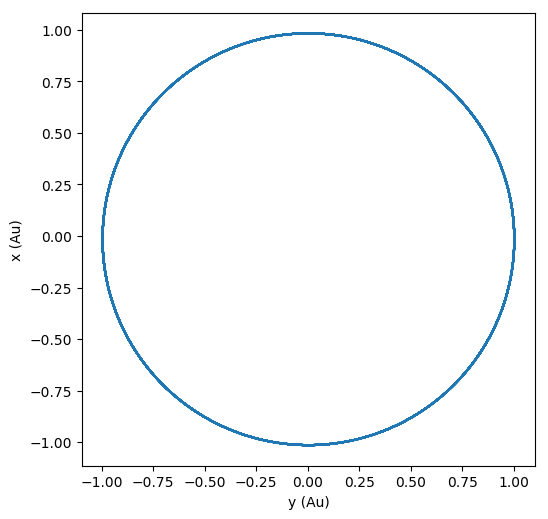

In [10]:
fig=plt.figure(figsize=(9, 6), dpi= 100, facecolor='w', edgecolor='k') #To modify the size of the figure
ax = fig.add_subplot(111) #definition de l'axe

#Plot de la trajectoire simulee:        
ax.plot(terre.x, terre.y) #Plot de la trajectoire simulee de la terre

plt.xlabel("y (Au)")
plt.ylabel("x (Au)")
plt.gca().set_aspect('equal', adjustable='box') #equal ratios of x and y

plt.show()

**Estimation précision en regardant l'énergie mécanique:**

Résultats : 
Energie moyenne = -0.999962510791, Ecart_Type = 2.3525948901e-05


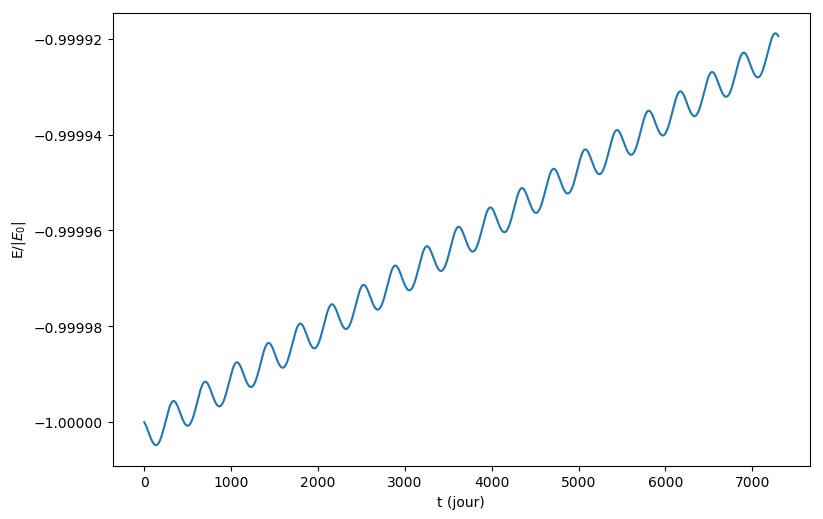

In [11]:
Nrg = E(soleil.masse, terre.x, terre.y, terre.vx, terre.vy) #Calcul d'energie mecanique
Nrg /= np.abs(Nrg[0])  #Pour Normaliser l'energie et pour faire un plot plus significatif

#Definition de figure
fig=plt.figure(figsize=(9, 6), dpi= 100, facecolor='w', edgecolor='k') #To modify the size of the figure
ax = fig.add_subplot(111) #definition de l'axe

#Plot d'energie en fonction de temps
t = np.linspace(1,T,T)*dt
ax.plot(t, Nrg)

ax.set_xlabel("t (jour)")
ax.set_ylabel("E/$|E_0|$")

ax.get_yaxis().get_major_formatter().set_useOffset(False) #Disable scaling of values in plot wrt y-axis

#Affichage de l'energie moyenne
print("Résultats : ")
print("Energie moyenne = " + str(np.mean(Nrg)) + ", Ecart_Type = " + str(np.std(Nrg)))

plt.show()

On voit bien que le Runge-Kutta est plus précis que Euler compte tenu du fait que avec le même pas d'intégration $dt=1 \ jour$, on a une trajectoire plus précise et un écart-type de l'énergie plus petit dans le cas d'intégration par Runge-Kutta.

### 1.3.4 Intégration par Leapfrog:

Puisque, les méthodes précédentes ne conservent pas l'énérgie mécanique, il faut envisager des méthodes d'intégrations qui conservent l'énergie, ces méthodes sont dites symplectiques.

**Méthode:**

Cette méthode d'intégration comme son nom l'indique, consiste à calculer les positions et les vitesses dans des endroits différents de la manière suivante:

$$\vec{X}_{i+1} = \vec{X_{i}} + h.\vec{V}_{i+1/2} $$

$$\vec{V}_{i+3/2} = \vec{V}_{i+1/2} + h.\vec{F}(\vec{X}_{i+1}) $$

Ici, on aura besoin de $\vec{V}_{1/2}$ pour initier l'algorithme, on fait alors l'approximation suivante:

$$ \vec{V}_{1/2} = \vec{V}_0 + \frac{h}{2}.\vec{F}(\vec{X}_{0}) $$

Cette étape nous coûte un erreur de l'ordre de $h²$, ce qui est tolérable parce qu'il s'agit d'une méthode de second ordre, donc cette étape n'influe pas sur la précision globale de l'intégration.

Pour plus d'informations sur ce schéma voir les liens ci-dessous:

http://physics.ucsc.edu/~peter/242/leapfrog.pdf

https://en.wikipedia.org/wiki/Leapfrog_integration


**Implémentation:** (dans le fichier Interaction_Soleil_Planete_LeapFrog.py)

In [12]:
#----------------------------------------------------------------------------------------------------------

# Integration des equations de newton par LeapFrog

#-------------------------

#Definition des vitesses au milieux
vx_demi = np.zeros(T); vx_demi[0] = terre.vx0 + (dt/2)*fx(soleil.masse, terre.x0, terre.y0)
vy_demi = np.zeros(T); vy_demi[0] = terre.vx0 + (dt/2)*fy(soleil.masse, terre.x0, terre.y0)

for i in range(T-1): 

# Affectation des positions à l'indice i+1
	terre.x[i+1] = terre.x[i] + dt*vx_demi[i]
	terre.y[i+1] = terre.y[i] + dt*vy_demi[i]
    
#Affectation des vitesses:
	vx_demi[i+1] = vx_demi[i] + dt*fx(soleil.masse, terre.x[i+1], terre.y[i+1])
	vy_demi[i+1] = vy_demi[i] + dt*fy(soleil.masse, terre.x[i+1], terre.y[i+1])
    
    #Affecter les vitesses de la terre par celles de milieu
	terre.vx = vx_demi; terre.vy = vy_demi


**Plot de trajectoire:**

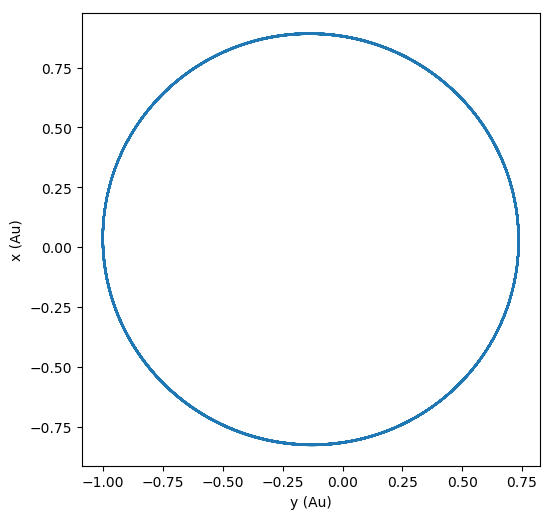

In [13]:
fig=plt.figure(figsize=(9, 6), dpi= 100, facecolor='w', edgecolor='k') #To modify the size of the figure
ax = fig.add_subplot(111) #definition de l'axe

#Plot de la trajectoire simulee:        
ax.plot(terre.x, terre.y) #Plot de la trajectoire simulee de la terre

plt.xlabel("y (Au)")
plt.ylabel("x (Au)")
plt.gca().set_aspect('equal', adjustable='box') #equal ratios of x and y

plt.show()

**Estimation précision en regardant l'énergie mécanique:**

Résultats : 
Energie moyenne = -0.998745037051, Ecart_Type = 0.00247426160981


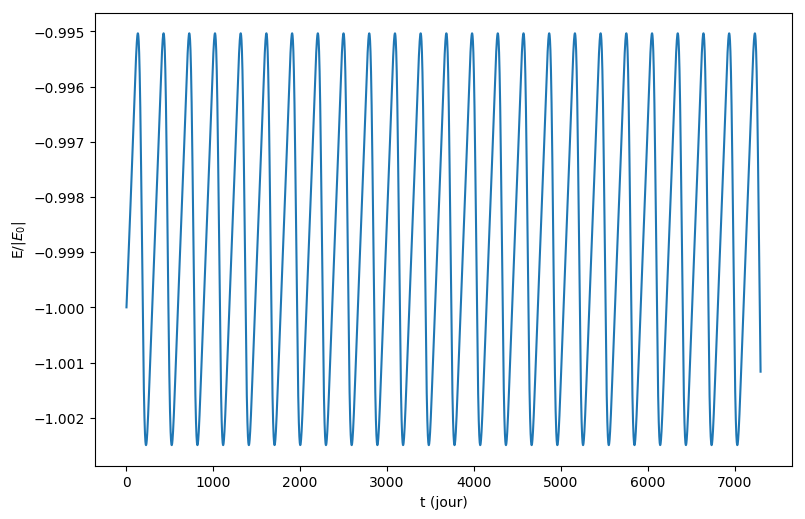

In [14]:
Nrg = E(soleil.masse, terre.x, terre.y, terre.vx, terre.vy) #Calcul d'energie mecanique
Nrg /= np.abs(Nrg[0])  #Pour Normaliser l'energie et pour faire un plot plus significatif

#Definition de figure
fig=plt.figure(figsize=(9, 6), dpi= 100, facecolor='w', edgecolor='k') #To modify the size of the figure
ax = fig.add_subplot(111) #definition de l'axe

#Plot d'energie en fonction de temps
t = np.linspace(1,T,T)*dt
ax.plot(t, Nrg)

ax.set_xlabel("t (jour)")
ax.set_ylabel("E/$|E_0|$")

ax.get_yaxis().get_major_formatter().set_useOffset(False) #Disable scaling of values in plot wrt y-axis

#Affichage de l'energie moyenne
print("Résultats : ")
print("Energie moyenne = " + str(np.mean(Nrg)) + ", Ecart_Type = " + str(np.std(Nrg)))

plt.show()

Vu les résultats ci-dessus, on voit bien que Leap-Frog est un schéma d'intégration symplectique qui conserve l'énergie, mais l'incovénient de cette méthode se manifeste dans le faite que la position et la vitesse ne sont pas calculées au même instant d'où la méthode suivante:

### 1.3.5 Intégration par Verlet:

**Méthode:**

Cette méthode d'intégration est similaire à la méthode de leapfrog, mais elle permet de calculer les positions et les vitesses aux mêmes endroits, ce qui permet par exemple de tracer un portrait de phase, on pourra implémenter cette méthode de la manière suivante:

$$\vec{X}_{i+1} = \vec{X_{i}} + h.\vec{V}_{i+1/2} $$

$$\vec{V}_{i+1} = \vec{V}_{i+1/2} + \frac{h}{2}.\vec{F}(\vec{X}_{i+1}) $$

telle que :

$$ \vec{V}_{i+1/2} = \vec{V}_{i} + \frac{h}{2}.\vec{F}(\vec{X}_{i}) $$

Pour plus d'informations sur ce schéma voir ces liens:

https://en.wikipedia.org/wiki/Verlet_integration

http://www.fisica.uniud.it/~ercolessi/md/md/node21.html

**Implémentation:** (dans le fichier Interaction_Soleil_Planete_Verlet.py)

In [15]:
#----------------------------------------------------------------------------------------------------------

# Integration des equations de newton par l'integrateur de Verlet

#-------------------------

#Il faut re-initier les vitesses à cause de la modification introduite par leapfrog
terre.vx[0] = terre.vx0; terre.vy[0] = terre.vy0

for i in range(T-1): 

#Definition des variables de milieux

	vx_demi = terre.vx[i] + (dt/2)*fx(soleil.masse, terre.x[i], terre.y[i])
	vy_demi = terre.vy[i] + (dt/2)*fy(soleil.masse, terre.x[i], terre.y[i])

# Affectation des positions à l'indice i+1
	terre.x[i+1] = terre.x[i] + dt*vx_demi
	terre.y[i+1] = terre.y[i] + dt*vy_demi

	terre.vx[i+1] = vx_demi + (dt/2)*fx(soleil.masse, terre.x[i+1], terre.y[i+1])
	terre.vy[i+1] = vy_demi + (dt/2)*fy(soleil.masse, terre.x[i+1], terre.y[i+1])
#----------------------------------------------------------------------------------------------------

** Plot de trajectoire: **

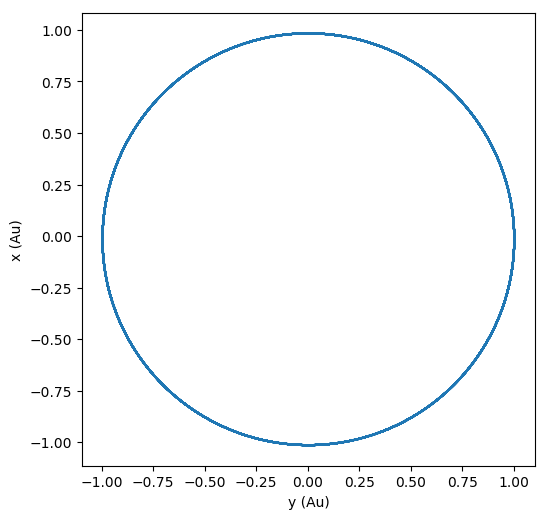

In [16]:
fig=plt.figure(figsize=(9, 6), dpi= 100, facecolor='w', edgecolor='k') #To modify the size of the figure
ax = fig.add_subplot(111) #definition de l'axe

#Plot de la trajectoire simulee:        
ax.plot(terre.x, terre.y) #Plot de la trajectoire simulee de la terre

plt.xlabel("y (Au)")
plt.ylabel("x (Au)")
plt.gca().set_aspect('equal', adjustable='box') #equal ratios of x and y

plt.show()

**Estimation précision en regardant l'énergie mécanique:**

Résultats : 
Energie moyenne = -0.999998104179, Ecart_Type = 1.66220647228e-06


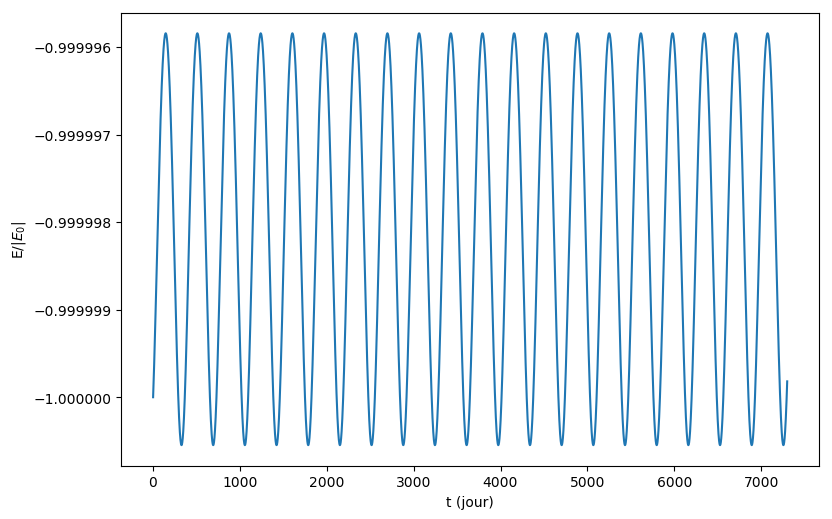

In [17]:
Nrg = E(soleil.masse, terre.x, terre.y, terre.vx, terre.vy) #Calcul d'energie mecanique
Nrg /= np.abs(Nrg[0])  #Pour Normaliser l'energie et pour faire un plot plus significatif

#Definition de figure
fig=plt.figure(figsize=(9, 6), dpi= 100, facecolor='w', edgecolor='k') #To modify the size of the figure
ax = fig.add_subplot(111) #definition de l'axe

#Plot d'energie en fonction de temps
t = np.linspace(1,T,T)*dt
ax.plot(t, Nrg)

ax.set_xlabel("t (jour)")
ax.set_ylabel("E/$|E_0|$")

ax.get_yaxis().get_major_formatter().set_useOffset(False) #Disable scaling of values in plot wrt y-axis

#Affichage de l'energie moyenne
print("Résultats : ")
print("Energie moyenne = " + str(np.mean(Nrg)) + ", Ecart_Type = " + str(np.std(Nrg)))

plt.show()

On peut conclure que la méthode de Verlet est la plus précise, vu les valeurs de l'écart-type de l'énergie, donc d'ici jusqu'à la fin de ce rapport on utilisera le schéma de Verlet comme méthode d'intégration des équations de Newton.

## 1.4 Implémentation de système solaire:

Maintenant, puisque on a compris comment évolue une seule planète autour de soleil, on va simuler la dynamique des planètes de système solaire autour de soleil.

Dans cette partie, on doit faire appel à une approche similaire mais un peu différente, parce que pour chaque planète de système solaire on doit tenir compte de la force gravitationnelle des autres planètes, donc on doit intégrer des nouvelles équations qui tiennent en compte du couplage entre les planètes.

### 1.4.1 Equations de Newton:

On va faire l'hypothèse que le soleil reste fixe à cause de sa grande masse, alors on aura:

$$
(\forall \ i \in \ [| 1,8 |] )\ ; \ \frac{d²\vec{r}_i}{dt²} = -G\sum_{j = 0 ; \ j \neq i}^{9} \frac{M_j}{||\vec{r_i}-\vec{r_j}||^{3}} (\vec{r_i}-\vec{r_j})$$

Avec: 

* Objet 0: Soleil
* Objet $i$ tel que $i \ \in \ [|1,9|]$: les planètes de système solaire de Mercure à Neptune et la planète naine Pluto.


### 1.4.2 Conditions Initiales et définition de système solaire:

Une façon de stocker les positions initiales des objets consiste à les stocker dans un fichier texte qu'on peut nommer "initial_conditions_solarsystem.txt", pour des raisons techniques de Python, on va stocker les noms des objets dans un autre fichier "names_solarsystem.txt". (A cause des problèmes d'encodage on ne peut qu'importer un seul type de données avec la méthode de **numpy** : $np.genfromtxt$).

On choisit comme date de début le "2017-02-28" à "00:00 GMT".

Maintenant on a tout ce qu'il faut pour définir les objets de notre système solaire. Tout d'abord, on va créer les objets à partir de la classe **objet**.

In [18]:
bodies = np.array([objet() for i in range(10)])  #Creation d'une liste des objets (on a au total 10 objets: soleil et 8 planetes et Pluto)

Après, il faut charger les données relatives aux paramètres des objets de système solaire afin d'initialiser leurs attributs.

In [19]:
import os
os.chdir("/home/mh541/Desktop/Projet_Numerique/In_2dim") #Please change to the to the directory where 'initial_conditions_solarsystem.txt' is saved 

data = np.genfromtxt("initial_conditions_solarsystem.txt", usecols=(1,2,3,4,5), skip_header=1) #On ne peut pas importer du texte avec genfromtxt
names = np.loadtxt("names_solarsystem.txt", dtype = str, skiprows=1, usecols=(1,))

Ici, il ne reste qu'à affecter les valeurs chargées aux attributs des objets. On définit aussi "Nbr_obj" la variable qui contient le nombre total des objets dans notre système.

In [20]:
#Definition des parametres de chaque objet

Nbr_obj = len(bodies) #Definition de Nbr d'objets

for i in range(Nbr_obj):
	bodies[i].nom = names[i][2:-1] # [2:-1] pour supprimer les caracteres indesires
	bodies[i].masse = data[i][0]
	bodies[i].x0 = data[i][1]
	bodies[i].y0 = data[i][2]
	bodies[i].vx0 = data[i][3]
	bodies[i].vy0 = data[i][4]

### 1.4.3 Calcul d'accélération et d'énergie totale:

Comme approche naîve, on va tenir compte des couplages entre les autres objets autre que le soleil.
Pour simplifier la tâche de calcul d'accelération dû à la gravitation subit par un objet, ça serait mieux de définir la fonction **acceleration** qui permet de calculer cette accelération à un instant donné pour un objet donné.

(Cette fonction est dans objet.py)

In [21]:
def acceleration(bodies, i, j):
	"""
	Calculer l'acceleration relative à un objet bodies[i]
	bodies: tous les objets
	i: index of concerned body which undergoes the gravitation of other objects.
	j: index of the step
	"""
	N = len(bodies)

	ax = 0; ay = 0 #L'acceleration

	for jp in range(N):
		#Chaque objet bodies[jp] applique une force de gravitation sur l'objet bodies[i] 
		if jp == i: #On ne veut pas avoir le même objet bodies[jp]
			continue
		ax += fx(bodies[jp].masse, bodies[i].x[j]-bodies[jp].x[j], bodies[i].y[j]-bodies[jp].y[j]) #Effet du à l'objet bodies[jp] 
		ay += fy(bodies[jp].masse, bodies[i].x[j]-bodies[jp].x[j], bodies[i].y[j]-bodies[jp].y[j]) #---

	return ax, ay

Cette fonction permet de retourner les accélérations suivant les axes x et y, en prenant comme paramètres la liste des objets $bodies$, et l'indice de l'objet concerné en plus de l'indice de pas voulu.

Pour évaluer la conservation d'énergie pendant l'intergration des équation de mouvement, c'est préférable de créer la fonction **Energy** qui permet de calculer l'énergie mécanique de chaque objet.

(Ces fonctions seront dans objet.py)

In [22]:
#On calcule d'abord l'energie potentielle
def pot(M, x, y):
	"""
	Retourne le potentiel massique d'un objet par rapport à un autre objet de masse M et distants de x**2+y**2
	"""
	return -(G*M)/(np.sqrt(x**2+y**2)*au)

def Energy(bodies, i):
	"""
	L'Energie massique d'un objet sous l'effet d'autres objet qui lui entoure.
	"""

	N = len(bodies)

	potential = 0

	for jp in range(N):
		if jp == i:
			continue

		potential += pot(bodies[jp].masse, bodies[i].x-bodies[jp].x, bodies[i].y-bodies[jp].y)

	return 0.5*(au**2/jour**2)*(bodies[i].vx**2+bodies[i].vy**2)+potential

### 1.4.4 Intégrations des équations de mouvement:

Les objets maintement sont bien défini, il suffit maintenant d'intérger les équations de mouvement définit dans **1.4.1** pour avoir les trajectoires.

Puisque dans la partie précédente **1.3**, on a vu que le schéma d'intergration de Verlet est le plus précis et permet aussi de conserver l'énergie mécanique, alors on va s'en servir pour déduire les trajectoires des planètes.

**Implémentation:**

In [23]:
#Redefinition des steps
dt = 2 #step
T = int(365/dt)*165 # (Nombre de steps)<-> Periode d'integration

#Definition des vitesses au milieu
vx_demi = np.zeros(Nbr_obj)
vy_demi = np.zeros(Nbr_obj)

#Intialisation des attributs x,y,vx,vy de chaque objet bodies[i]
for i in range(Nbr_obj):
	bodies[i].x = np.zeros(T); bodies[i].x[0] = bodies[i].x0
	bodies[i].y = np.zeros(T); bodies[i].y[0] = bodies[i].y0

	bodies[i].vx = np.zeros(T); bodies[i].vx[0] = bodies[i].vx0
	bodies[i].vy = np.zeros(T); bodies[i].vy[0] = bodies[i].vy0

#Integration a l'aide de schema de Verlet
for j in range(T-1):#A chaque pas de temps j

    #Phase 1: Calcul de vitesses milieu et affectation des position a l'intant j+1
	for i in range(1,Nbr_obj): #Modification des parametres pour chaque objet a un instant donne j

		fx_j, fy_j = acceleration(bodies, i, j) #Calcul de l'acceleration au pas j relative à l'objet i

		#Affectation des vitesses de milieu
		vx_demi[i] = bodies[i].vx[j] + (dt/2)*fx_j
		vy_demi[i] = bodies[i].vy[j] + (dt/2)*fy_j

		# Affectation des positions à l'indice j+1
		bodies[i].x[j+1] = bodies[i].x[j] + dt*vx_demi[i]
		bodies[i].y[j+1] = bodies[i].y[j] + dt*vy_demi[i]

    #Phase 2: Affectation des vitesse a l'instant j+1   
	for i in range(1,Nbr_obj):
        
		#L'acceleration au pas j+1 relative à l'objet j
		fx_jplus1, fy_jplus1 = acceleration(bodies, i, j+1) #Il faut faire cette étape après le calcul de postion à l'indice i+1

        # Affectation des vitesses à l'indice j+1
		bodies[i].vx[j+1] = vx_demi[i] + (dt/2)*fx_jplus1
		bodies[i].vy[j+1] = vy_demi[i] + (dt/2)*fy_jplus1

**Plot des trajectoires:**

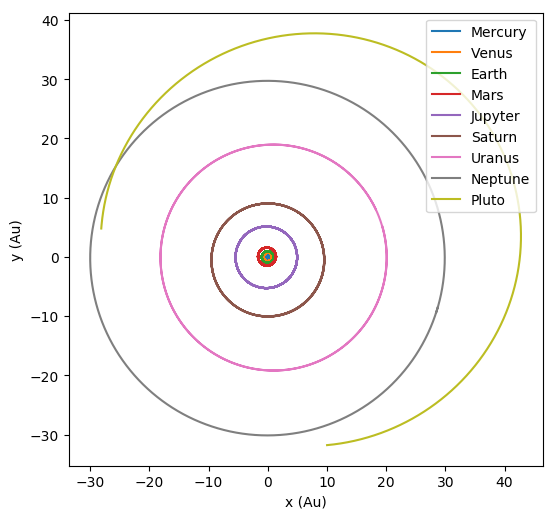

In [24]:
#Definition de figure
fig=plt.figure(figsize=(9, 6), dpi= 100, facecolor='w', edgecolor='k') #To modify the size of the figure
ax = fig.add_subplot(111) #definition de l'axe

#Pour chaque objet faire un plot (Soleil non inclus)
for i in range(1,Nbr_obj):
	ax.plot(bodies[i].x, bodies[i].y, label= bodies[i].nom)

plt.xlabel("x (Au)")
plt.ylabel("y (Au)")

plt.gca().set_aspect('equal', adjustable='box') #equal ratios of x and y

plt.legend()
plt.show()

**Estimation précision en regardant l'énergie mécanique:**

Résultats : 
Energie moyenne = -1.00108511842, Ecart_Type = 0.00179934574034


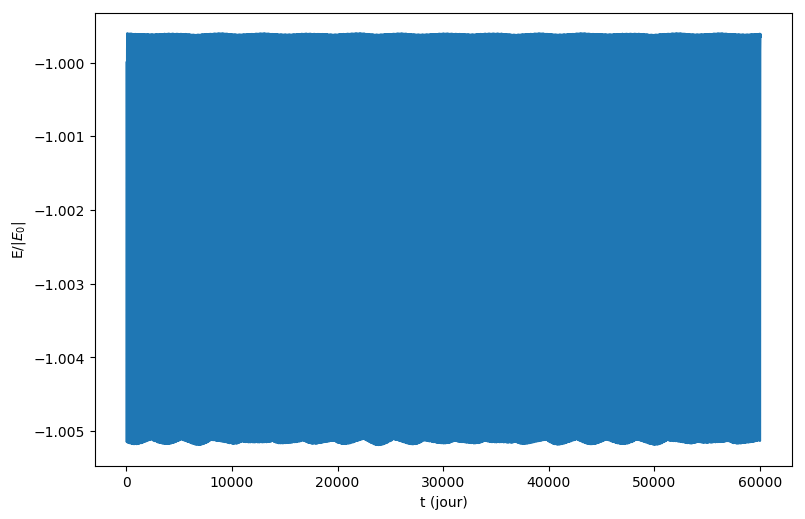

In [25]:
#Definition de figure
fig=plt.figure(figsize=(9, 6), dpi= 100, facecolor='w', edgecolor='k') #To modify the size of the figure
ax = fig.add_subplot(111) #definition de l'axe


Nrg = Energy(bodies, 1) #Cacul de l'energie d'un objet -> Changez le numero pour voir l'energie de chaque objet;
Nrg /= np.abs(Nrg[0])  #Pour Normaliser

#Plot de l'energie
t = np.linspace(1,T,T)*dt
ax.plot(t, Nrg)
# ax.plot(t[:365], Nrg[:365])

ax.set_xlabel("t (jour)")
ax.set_ylabel("E/$|E_0|$")

ax.get_yaxis().get_major_formatter().set_useOffset(False) #Disable scaling of values in plot wrt y-axis

#Affichage des résulats
print("Résultats : ")
print("Energie moyenne = " + str(np.mean(Nrg)) + ", Ecart_Type = " + str(np.std(Nrg)))

plt.show()

Pour une période d'intégration de 165 ans avec un pas de 2 jours, on observe que les planètes décrivent des trajectoires fermées avec une très bonne précision.

On remarque aussi que l'écart-type de l'énergie dimunie si on raffine le pas d'intégration $dt$, ce qui montre que l'implémentation du schéma d'intégration marche bien.

Dans la figure ci-dessus, on voit des oscillations rapides en energie de Mercure par rapport à la période totale d'intégration, pour bien voir les oscillations d'énergie mécanique (massique) de chaque planète, remplacez "ax.plot(t, Nrg)" par "ax.plot(t[:365], Nrg[:365])" dans le code au-dessus.

Pour conclure cette partie, on peut dire que notre schéma d'intégration de Verlet permet de simuler les trajectoires des planètes en **2D** avec une très bonne précision.